In [ ]:
cd /content/drive/MyDrive/tophd

/content/drive/MyDrive/tophd


In [ ]:
#!git clone https://gitlab.com/bottle_shop/snowman-applications/snowman-application-tasks-ay21-22.git

In [ ]:
cd snowman-application-tasks-ay21-22/

/content/drive/MyDrive/tophd/snowman-application-tasks-ay21-22


In [ ]:
ls

dataset/  README.md


In [ ]:
cd dataset/

/content/drive/MyDrive/tophd/snowman-application-tasks-ay21-22/dataset


In [ ]:
ls

glove.6B.100d.txt  glove.6B.zip         textcnn_model         train.csv
glove.6B.200d.txt  glove.840B.300d.txt  train2.csv            train.gsheet
glove.6B.300d.txt  test_cleaned.csv     train_cleaned.csv
glove.6B.50d.txt   test.csv             train_cleaned.gsheet


In [ ]:
import os
import re
from tqdm import tqdm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
import pandas as pd
df_train = pd.read_csv("train.csv",encoding='cp1252')
df_test = pd.read_csv("test.csv",encoding='cp1252')

In [ ]:
df_train.shape

(12829, 3)

In [ ]:
df_test.shape

(3206, 3)

In [ ]:
df_train.head()

,id,Tweets,Label
0,7281,The jokes and puns are flying free in this cam...,none
1,7282,#MKR Lets see who the producers think are goin...,none
2,7283,Praying Jac and Shaz do well! They're my faves...,none
3,7284,RT @realityraver: Pete Evans the Paleo Capital...,none
4,7285,If Kat and Andre stay tonight I will stop watc...,none


In [ ]:
df_train['Label'].value_counts()

none      8747
sexism    2534
racism    1548
Name: Label, dtype: int64

In [ ]:
df_test.head()

,id,Tweets,Label
0,5014,#mkr at least there are judging honestly,none
1,5015,At the end of this Steve is going to run away ...,none
2,5016,Catching up on #MKR. Did Nikki &amp; Katie get...,none
3,5017,Has anyone made a Twitter account for Rob's ha...,none
4,5020,Will someone pls assist Colin in the washing o...,none


In [ ]:
df_test['Label'].value_counts()

none      2186
sexism     633
racism     387
Name: Label, dtype: int64

In [ ]:
df_train['num_of_word'] = df_train['Tweets'].apply(lambda x : len(x.split()))
df_test['num_of_word'] = df_test['Tweets'].apply(lambda x: len(x.split()))

In [ ]:
import seaborn as sns

In [ ]:
sns.set_theme()
sns.displot(data=df_train,x='num_of_word',kde=True);

ValueError: ignored

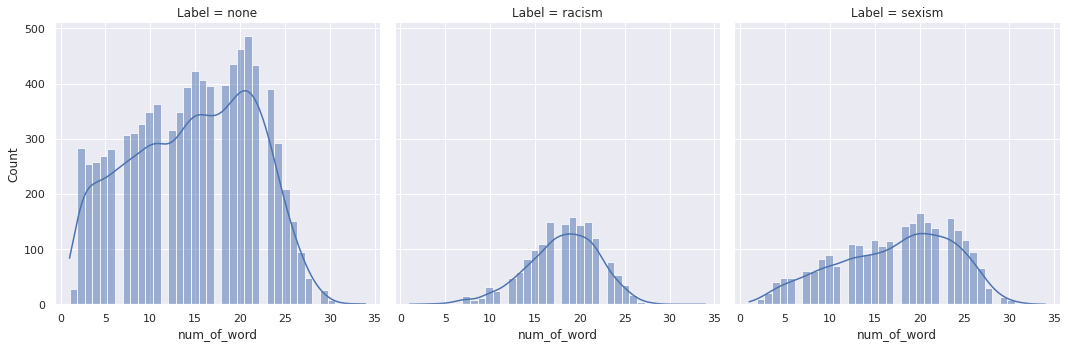

In [ ]:
sns.displot(data=df_train,x='num_of_word',col='Label',kde=True);

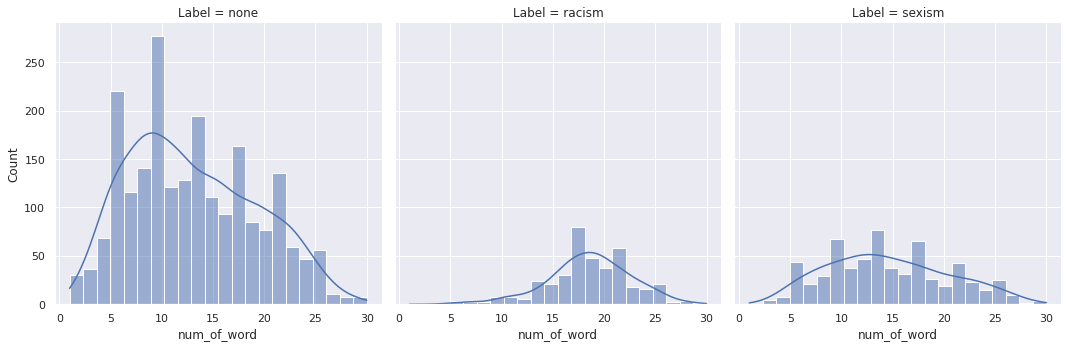

In [ ]:
sns.displot(data=df_test, x='num_of_word', col='Label',kde=True);

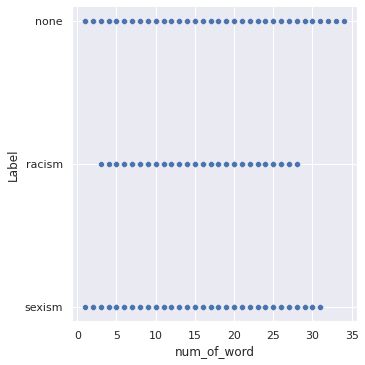

In [ ]:
sns.relplot(data=df_train,x="num_of_word", y="Label");

In [ ]:
#preprocessing
import nltk
nltk.download("stopwords")
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
def text_preprocessing(s):
  #lower text
  s = s.lower()
  # Change 't to 'not'
  s = re.sub(r"\'t", " not", s)
  # Change ':P to ''
  s = re.sub(r"\ :P", "", s)
  # Change '&gt to ''
  s = re.sub(r"\ &gt", "", s)
  #remove link
  s = re.sub(r'http\S+','',s)
  # Remove @name
  s = re.sub(r'(@.*?)[\s]', ' ', s)
  # Isolate and remove punctuations except '?'
  s = re.sub(r'([\'\"\.\(\)\!\?\\\/\,\^\*])', r' \1 ', s)
  s = re.sub(r'[^\w\s\?]', ' ', s)
  # Remove some special characters
  s = re.sub(r'([\;\:\|•«\n])', ' ', s)
  # Remove stopwords except 'not' and 'can'
  s = " ".join([word for word in s.split() if word not in stopwords.words('english') or word in ['not', 'can']])
  # Remove trailing whitespace
  s = re.sub(r'\s+', ' ', s).strip()

  return s

In [ ]:
train = df_train
test = df_test

In [ ]:
train['Tweets'] = train['Tweets'].apply(text_preprocessing)
test['Tweets'] = test['Tweets'].apply(text_preprocessing) 

In [ ]:
#encode label
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
train['Label'] = le.fit_transform(train['Label'])
train.head()

,id,Tweets,Label
0,7281,jokes puns flying free camping episode mkr mkr...,0
1,7282,mkr lets see producers think going better tv k...,0
2,7283,praying jac shaz well faves mkr,0
3,7284,rt pete evans paleo capitalist cookbook pulled...,0
4,7285,kat andre stay tonight stop watching kitchen r...,0


In [ ]:
le.classes_

array(['none', 'racism', 'sexism'], dtype=object)

In [ ]:
#encode label test set
from sklearn.preprocessing import LabelEncoder
test['Label'] = le.transform(test['Label'])
test.head()

,id,Tweets,Label
0,5014,mkr least judging honestly,0
1,5015,end steve going run away mexico go witness pro...,0
2,5016,catching mkr nikki amp katie get script say th...,0
3,5017,anyone made twitter account rob hat yet ? mkr,0
4,5020,someone pls assist colin washing hair sorry co...,0


In [ ]:
!pip install gensim

In [ ]:
#!wget https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz

--2020-11-29 09:01:16--  https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.217.69.102
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.217.69.102|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1647046227 (1.5G) [application/x-gzip]
Saving to: ‘GoogleNews-vectors-negative300.bin.gz.1’

GoogleNews-vectors- 100%[===================>]   1.53G  34.4MB/s    in 48s     

2020-11-29 09:02:05 (32.5 MB/s) - ‘GoogleNews-vectors-negative300.bin.gz.1’ saved [1647046227/1647046227]



In [ ]:
ls

glove.6B.100d.txt  glove.840B.300d.txt                    train2.csv
glove.6B.200d.txt  GoogleNews-vectors-negative300.bin.gz  train_cleaned.csv
glove.6B.300d.txt  test_cleaned.csv                       train_cleaned.gsheet
glove.6B.50d.txt   test.csv                               train.csv
glove.6B.zip       textcnn_model                          train.gsheet


In [ ]:
%%time
import gensim
from gensim.models import Word2Vec

wv = gensim.models.KeyedVectors.load_word2vec_format("GoogleNews-vectors-negative300.bin.gz", binary=True)
wv.init_sims(replace=True)

CPU times: user 1min 52s, sys: 2.86 s, total: 1min 55s
Wall time: 1min 55s


In [ ]:
import logging
#average the two word vectors
def word_averaging(wv, words):
    all_words, mean = set(), []
    
    for word in words:
        if isinstance(word, np.ndarray):
            mean.append(word)
        elif word in wv.vocab:
            mean.append(wv.syn0norm[wv.vocab[word].index])
            all_words.add(wv.vocab[word].index)

    if not mean:
        # logging.warning("cannot compute similarity with no input %s", words)
        return np.zeros(wv.vector_size,)

    mean = gensim.matutils.unitvec(np.array(mean).mean(axis=0)).astype(np.float32)
    return mean

def  word_averaging_list(wv, text_list):
    return np.vstack([word_averaging(wv, post) for post in text_list ])

In [ ]:
def w2v_tokenize_text(text):
    tokens = []
    for sent in nltk.sent_tokenize(text, language='english'):
        for word in nltk.word_tokenize(sent, language='english'):
            if len(word) < 2:
                continue
            tokens.append(word)
    return tokens

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
from sklearn.model_selection import train_test_split
train, val = train_test_split(train[['Tweets','Label']], test_size=0.1, random_state = 10)

train_tokenized = train.apply(lambda r: w2v_tokenize_text(r['Tweets']), axis=1).values
val_tokenized = val.apply(lambda r: w2v_tokenize_text(r['Tweets']), axis=1).values

In [ ]:
X_train_w2v = word_averaging_list(wv,train_tokenized)
X_val_w2v = word_averaging_list(wv,val_tokenized)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: DeprecationWarning: Call to deprecated `syn0norm` (Attribute will be removed in 4.0.0, use self.wv.vectors_norm instead).
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


In [ ]:
y_train = train['Label']
y_val = val['Label']

In [ ]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
#tuning hyper parameter using grid search
def tuning_param(grid, model):
  cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=10)
  grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='f1_macro',error_score=0)
  grid_result = grid_search.fit(X_train_w2v, y_train)
  #best results
  print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

In [ ]:
from sklearn.metrics import classification_report
target_names = ['none', 'racism', 'sexism']
#print classification report
print(classification_report(y_test, y_test_pred, target_names=target_names))

              precision    recall  f1-score   support

        none       0.69      1.00      0.81      2186
      racism       1.00      0.06      0.12       387
      sexism       0.00      0.00      0.00       633

    accuracy                           0.69      3206
   macro avg       0.56      0.35      0.31      3206
weighted avg       0.59      0.69      0.57      3206



In [ ]:
%%time
#model 2 : LogisticRegression
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
solver = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l1','l2']
C_value = [100, 10, 1.0, 0.1, 0.01]
grid = dict(solver = solver, penalty = penalty, C= C_value)
tuning_param(grid = grid, model = model)

Best: 0.731564 using {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
CPU times: user 4.99 s, sys: 661 ms, total: 5.65 s
Wall time: 7min 23s


In [ ]:
#create model 2
LG_model = LogisticRegression(C=10, solver='newton-cg',penalty='l2')
LG_model.fit(X_train_w2v,y_train)
LG_model.score(X_val_w2v,y_val)

0.7982683982683982

In [ ]:
test_tokenized = test.apply(lambda r: w2v_tokenize_text(r['Tweets']), axis=1).values
X_test_w2v = word_averaging_list(wv,test_tokenized)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: DeprecationWarning: Call to deprecated `syn0norm` (Attribute will be removed in 4.0.0, use self.wv.vectors_norm instead).
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


In [ ]:
y_test = test['Label']

In [ ]:
from sklearn.metrics import classification_report
target_names = ['none', 'racism', 'sexism']
y_pred_LG = LG_model.predict(X_test_w2v)
print(classification_report(y_test, y_pred_LG, target_names=target_names))

              precision    recall  f1-score   support

        none       0.77      0.94      0.85      2186
      racism       1.00      0.62      0.76       387
      sexism       0.55      0.25      0.34       633

    accuracy                           0.77      3206
   macro avg       0.77      0.60      0.65      3206
weighted avg       0.75      0.77      0.74      3206



In [ ]:
from tqdm import tqdm
tqdm.pandas(desc="progress-bar")
from gensim.models import Doc2Vec
from sklearn import utils
import gensim
from gensim.models.doc2vec import TaggedDocument
import re

In [ ]:
def label_sentences(corpus, label_type):
    """
    Gensim's Doc2Vec implementation requires each document/paragraph to have a label associated with it.
    We do this by using the TaggedDocument method. The format will be "TRAIN_i" or "TEST_i" where "i" is
    a dummy index of the post.
    """
    labeled = []
    for i, v in enumerate(corpus):
        label = label_type + '_' + str(i)
        labeled.append(TaggedDocument(v.split(), [label]))
    return labeled

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(train.Tweets, train.Label, test_size=0.1, random_state =10)
X_train = label_sentences(X_train, 'Train')
X_val = label_sentences(X_val, 'Val')
X_test = label_sentences(X_test,'Test')
all_data = X_train + X_val + X_test

In [ ]:
model_dbow = Doc2Vec(dm=0, vector_size=300, negative=5, min_count=1, alpha=0.065, min_alpha=0.065)
model_dbow.build_vocab([x for x in tqdm(all_data)])

100%|██████████| 13597/13597 [00:00<00:00, 1810474.65it/s]


In [ ]:
for epoch in range(30):
    model_dbow.train(utils.shuffle([x for x in tqdm(all_data)]), total_examples=len(all_data), epochs=1)
    model_dbow.alpha -= 0.002
    model_dbow.min_alpha = model_dbow.alpha

100%|██████████| 13597/13597 [00:00<00:00, 1964044.20it/s]


In [ ]:
def get_vectors(model, corpus_size, vectors_size, vectors_type):
    """
    Get vectors from trained doc2vec model
    :param doc2vec_model: Trained Doc2Vec model
    :param corpus_size: Size of the data
    :param vectors_size: Size of the embedding vectors
    :param vectors_type: Training or Testing vectors
    :return: list of vectors
    """
    vectors = np.zeros((corpus_size, vectors_size))
    for i in range(0, corpus_size):
        prefix = vectors_type + '_' + str(i)
        vectors[i] = model.docvecs[prefix]
    return vectors

In [ ]:
train_vectors_dbow = get_vectors(model_dbow, len(X_train), 300, 'Train')
val_vectors_dbow = get_vectors(model_dbow, len(X_val), 300, 'Val')

In [ ]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
#tuning hyper parameter using grid search
def tuning_param(grid, model):
  cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=10)
  grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='f1_macro',error_score=0)
  grid_result = grid_search.fit(train_vectors_dbow, y_train)
  #best results
  print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

In [ ]:
%%time
#model 2 : LogisticRegression
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
solver = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l1','l2']
C_value = [100, 10, 1.0, 0.1, 0.01]
grid = dict(solver = solver, penalty = penalty, C= C_value)
tuning_param(grid = grid, model = model)

Best: 0.740741 using {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}
CPU times: user 3.38 s, sys: 639 ms, total: 4.02 s
Wall time: 12min 58s


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
#create model 2
LG_model = LogisticRegression(C=1.0, solver='lbfgs',penalty='l2')
LG_model.fit(train_vectors_dbow,y_train)
LG_model.score(val_vectors_dbow,y_val)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8192307692307692

In [ ]:
test_vectors_dbow = get_vectors(model_dbow, len(X_test), 300, 'Test')

In [ ]:
from sklearn.metrics import classification_report
target_names = ['none', 'racism', 'sexism']
y_pred_LG = LG_model.predict(test_vectors_dbow)
print(classification_report(y_test, y_pred_LG, target_names=target_names))

              precision    recall  f1-score   support

        none       0.76      0.97      0.85      2186
      racism       1.00      0.65      0.78       387
      sexism       0.54      0.14      0.22       633

    accuracy                           0.76      3206
   macro avg       0.76      0.58      0.62      3206
weighted avg       0.74      0.76      0.72      3206

